In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\i\Dez\Programming\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\i\Dez\Programming\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Import the training data and testing datasets
traindf = pd.read_csv("midterm_train.csv")
testdf = pd.read_csv("midterm_test.csv")

In [3]:
#rows of training dataset
traindf.shape

(160000, 101)

In [4]:
#rows of test dataset
testdf.shape

(40000, 100)

In [5]:
#Genral structure of training dataset
traindf.head(3)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,1.995229,1.788078,0.427321,5.516276,-7.303279,4.333247,-2.163782,-1.698103,16.317195,July,...,5.051982,-4.557742,5.228120,-0.830699,-5.257952,2.058820,2.561103,-9.300450,1.660624,0
1,2.550962,-1.652971,1.014979,1.769840,-5.787771,1.697927,0.031055,2.295134,-8.243895,Jun,...,5.551093,-1.761302,7.030544,-0.724838,9.439360,1.091741,1.712046,-6.176244,-0.159665,0
2,4.520158,1.705834,-0.483402,-16.423634,-2.078275,2.862478,-2.018185,0.512500,0.529130,July,...,5.459993,-2.327336,9.939302,7.098298,-3.644457,8.040217,-8.129974,3.452164,4.965949,1


In [6]:
#Genral structure of test dataset
testdf.head(3)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,1.368607,2.604793,6.765837,4.280368,-0.582010,-2.000340,3.806173,-1.877384,-37.474855,Aug,...,-0.236609,-1.097845,5.250329,8.640226,-3.253218,0.808148,-3.106186,-4.128531,4.331746,8.065896
1,2.479690,1.887749,2.295680,11.896309,-2.442769,-0.605399,2.086188,-1.199411,-21.641955,Jun,...,-0.293633,12.795210,3.415980,16.018836,3.019372,-7.146358,1.271185,-10.090987,11.438789,-1.346437
2,-0.096926,2.966818,0.780454,1.103289,-5.146363,5.947920,4.737213,-0.363367,-14.122471,Apr,...,-1.730590,-2.556036,-4.877640,-17.754149,3.505377,-20.454487,-0.585283,3.734787,-4.167357,0.617885


In [7]:
#inspect basic statstics of training dataset
traindf.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x10,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
count,159981.000000,159984.000000,159983.000000,159980.000000,159986.000000,159988.000000,159980.000000,159987.000000,159991.000000,159979.000000,...,159985.000000,159984.000000,159980.000000,159982.000000,159981.000000,159987.000000,159978.000000,159987.000000,159975.000000,160000.000000
mean,0.009261,-0.007223,-0.000507,0.015749,-0.001798,0.009769,-0.027185,0.008479,-2.415846,0.000733,...,-0.028914,-0.008523,0.019936,0.002212,0.002705,-0.001674,0.034681,-0.011464,0.923695,0.400781
std,5.338891,3.707944,5.005461,7.270931,3.355563,2.315157,4.959242,1.534470,13.316416,2.686618,...,6.915585,4.733332,9.545692,4.663293,9.500001,4.357044,8.763774,5.838035,2.904734,0.490058
min,-24.645209,-17.943278,-24.757139,-32.269321,-15.689236,-10.308264,-22.146263,-7.841160,-57.356416,-11.779618,...,-30.877776,-25.108884,-44.348132,-20.290743,-40.124338,-19.033530,-38.577298,-24.839794,-11.520999,0.000000
25%,-3.580299,-2.497350,-3.374684,-4.856098,-2.261850,-1.554943,-3.368197,-1.028248,-11.393598,-1.805576,...,-4.686251,-3.207967,-6.433650,-3.149750,-6.402301,-2.946334,-5.895623,-3.962449,-1.029612,0.000000
50%,0.007280,0.007029,0.010829,0.033179,-0.030225,0.017040,-0.023040,0.006215,-2.418394,-0.004148,...,-0.045576,-0.009056,0.036174,-0.004377,-0.015868,-0.003493,0.036823,-0.016904,0.916298,0.000000
75%,3.610607,2.488540,3.364734,4.929141,2.209388,1.570032,3.332090,1.047948,6.605949,1.818660,...,4.666491,3.179275,6.450933,3.153798,6.421899,2.933118,5.959402,3.925720,2.884914,1.000000
max,25.819338,14.675454,22.677190,31.233470,16.174123,10.409958,23.124870,6.537088,55.320596,12.388509,...,29.951884,20.208166,39.741947,20.609722,43.347723,18.205975,39.764031,26.424733,13.666173,1.000000


In [8]:
#inspect basic statstics of test dataset
testdf.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x10,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
count,39993.000000,39996.000000,39994.000000,39999.000000,39995.000000,39993.000000,39997.000000,39997.000000,39993.000000,39996.000000,...,39996.000000,39997.000000,39998.000000,39998.000000,39994.000000,39993.000000,39996.000000,39997.000000,39997.000000,39997.000000
mean,-0.025399,-0.004107,-0.010267,0.010824,0.006701,-0.001713,-0.031028,0.006576,-2.486196,-0.014560,...,-0.008649,0.043258,0.014270,-0.010303,-0.010090,0.017505,-0.027799,-0.002541,-0.044093,0.906600
std,5.342157,3.716111,5.011988,7.262036,3.360499,2.315799,4.928581,1.535508,13.243056,2.683840,...,1.119499,6.945717,4.741866,9.529218,4.637184,9.488989,4.358460,8.767215,5.842874,2.896848
min,-21.849026,-16.547162,-20.182674,-33.542658,-14.076118,-10.195890,-19.869828,-6.860489,-56.106267,-10.777784,...,-4.700963,-28.612090,-18.694306,-38.183435,-19.111667,-37.510653,-17.343956,-37.938796,-28.447937,-10.435920
25%,-3.645149,-2.508284,-3.374697,-4.897372,-2.258440,-1.564456,-3.395586,-1.040749,-11.425370,-1.820518,...,-0.765458,-4.667257,-3.185777,-6.423884,-3.168636,-6.336063,-2.934058,-5.891482,-3.992436,-1.050299
50%,-0.011660,0.000978,0.000185,0.025490,-0.047964,0.005486,-0.045142,0.011292,-2.500011,-0.010591,...,-0.000303,0.050774,-0.017942,-0.071096,-0.022253,-0.000620,-0.023966,0.046627,0.000101,0.897788
75%,3.572979,2.508332,3.371492,4.913779,2.233739,1.567317,3.307520,1.044895,6.428075,1.772172,...,0.744692,4.766548,3.191232,6.442694,3.117393,6.402235,2.922625,5.875463,3.891791,2.847916
max,21.586897,16.367001,20.604013,30.615624,14.211016,9.356742,19.881129,6.259320,52.494742,10.604162,...,4.531737,28.808502,22.086501,46.243922,18.669309,40.418782,18.581123,39.691331,27.673244,13.545457


In [9]:
#Get categorical variables
def describe_categorical(traindf):
    from IPython.display import display, HTML
    display(HTML(traindf[traindf.columns[traindf.dtypes == "object"]].describe().to_html()))
describe_categorical(traindf)

,x9,x46,x48,x60,x77
count,159983,159985,159979,159987,159983
unique,12,5,3,11,129375
top,Jun,wednesday,asia,0.01%,$111.32
freq,44010,96758,140972,38765,6


In [10]:
#Get categorical variables
def describe_categorical(testdf):
    from IPython.display import display, HTML
    display(HTML(testdf[testdf.columns[testdf.dtypes == "object"]].describe().to_html()))
describe_categorical(testdf)

,x9,x46,x48,x60,x77
count,39996,39998,39999,39998,39997
unique,12,5,3,10,37787
top,Jun,wednesday,asia,0.01%,$-439.97
freq,11114,24204,35353,9749,4


In [11]:
#Number of total missing values
traindf.isnull().T.any().T.sum()

1569

In [12]:
#Number of missing values in each variable
traindf.isnull().sum()

x0     19
x1     16
x2     17
x3     20
x4     14
x5     12
x6     20
x7     13
x8      9
x9     17
x10    21
x11    15
x12    15
x13    24
x14    18
x15    21
x16    11
x17    12
x18    20
x19    18
x20    25
x21    14
x22    14
x23    19
x24    19
x25    11
x26    14
x27    13
x28    16
x29    23
       ..
x71     8
x72     9
x73    11
x74    15
x75    15
x76    18
x77    17
x78    16
x79    17
x80    14
x81    17
x82    14
x83     8
x84    19
x85    12
x86    11
x87    12
x88    18
x89    10
x90    13
x91    15
x92    16
x93    20
x94    18
x95    19
x96    13
x97    22
x98    13
x99    25
y       0
Length: 101, dtype: int64

In [13]:
#Number of total missing values
testdf.isnull().T.any().T.sum()

431

In [14]:
#Number of missing values in each variable
testdf.isnull().sum()

x0     7
x1     4
x2     6
x3     1
x4     5
x5     7
x6     3
x7     3
x8     7
x9     4
x10    4
x11    6
x12    2
x13    5
x14    5
x15    2
x16    9
x17    4
x18    7
x19    4
x20    4
x21    4
x22    8
x23    2
x24    8
x25    5
x26    2
x27    5
x28    7
x29    3
      ..
x70    9
x71    5
x72    0
x73    4
x74    2
x75    2
x76    6
x77    3
x78    6
x79    6
x80    1
x81    2
x82    4
x83    2
x84    7
x85    2
x86    8
x87    7
x88    4
x89    5
x90    4
x91    3
x92    2
x93    2
x94    6
x95    7
x96    4
x97    3
x98    3
x99    3
Length: 100, dtype: int64

In [15]:
#Target dataframe
y = traindf.pop('y')

In [16]:
#Remove special characters
traindf[("x60")]=traindf["x60"].str.replace('%','').astype(float)
traindf[("x77")]=traindf["x77"].str.replace('$','').astype(float)

# Fill missing values with the means of the continuous features
traindf['x60'].fillna(method='ffill', inplace=True)
traindf['x77'].interpolate(method='linear', inplace=True)

In [17]:
# Fill missing values in train dataset
missing_variables = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8',
                     'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 
                     'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 
                     'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 
                     'x40', 'x41', 'x42', 'x43', 'x44', 'x45',        'x47',        'x49', 
                     'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 
                            'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 
                     'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76',        'x78', 'x79', 
                     'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 
                     'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99']
for trainvariable in missing_variables:
    traindf[trainvariable].fillna(traindf[trainvariable].mean(), inplace=True)

In [18]:
#Convert categorical data into dummy/numeric variables
categorical_variables = ['x46', 'x48',]
for trainvariable in categorical_variables:
    # Fill missing data with the word "Missing"
    traindf[trainvariable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(traindf[trainvariable], prefix=None)
    # Update testdf to include dummies and drop the main variable
    traindf = pd.concat([traindf, dummies], axis=1)
    traindf.drop([trainvariable], axis=1, inplace=True)

traindf.loc[(traindf['x60'] <= -0.01) & (traindf['x60'] <= -0.05), 'x60'] = 0
traindf.loc[traindf['x60'] == 0.00, 'x60'] = 1
traindf.loc[(traindf['x60'] >= 0.01) & (traindf['x60'] <= 0.05), 'x60'] = 2
traindf['x60'] = traindf['x60'].astype(int)

In [19]:
#Again, check the number of missing values in the training datatset
traindf.isnull().sum()

x0            0
x1            0
x2            0
x3            0
x4            0
x5            0
x6            0
x7            0
x8            0
x9           17
x10           0
x11           0
x12           0
x13           0
x14           0
x15           0
x16           0
x17           0
x18           0
x19           0
x20           0
x21           0
x22           0
x23           0
x24           0
x25           0
x26           0
x27           0
x28           0
x29           0
             ..
x80           0
x81           0
x82           0
x83           0
x84           0
x85           0
x86           0
x87           0
x88           0
x89           0
x90           0
x91           0
x92           0
x93           0
x94           0
x95           0
x96           0
x97           0
x98           0
x99           0
Missing       0
friday        0
monday        0
thurday       0
tuesday       0
wednesday     0
Missing       0
america       0
asia          0
euorpe        0
Length: 108, dtype: int6

In [20]:
#Drop the month and week variable
traindf.drop(['x9'], axis=1, inplace=True)

In [21]:
#Show all the columns in train dataset
def printall(traindf, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(traindf.to_html(max_rows=max_rows)))
    
printall(traindf)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x47,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,Missing,friday,monday,thurday,tuesday,wednesday,Missing,america,asia,euorpe
0,1.995229,1.788078,0.427321,5.516276,-7.303279,4.333247,-2.163782,-1.698103,16.317195,-5.252962,19.865234,3.095630,-11.737767,-1.812181,-2.670336,0.530303,5.322231,1.571383,1.280015,28.518345,7.838117,6.907220,-3.793471,-3.129521,6.388537,1.933956,-0.616690,1.114462,-10.511699,8.470415,-17.125572,-1.629352,-1.304302,-0.811353,-1.461163,-52.164515,-128.708759,4.517467,61.727692,39.585315,8.632843,-1.539473,39.279555,7.856023,58.025773,-2.039346,3.798755,-13.961991,-5.488145,4.027504,-0.296617,-0.663671,-1.242851,-180.439109,1.200852,15.736506,2.057282,1,-4.276429,-0.575574,-56.149082,0.053255,2.587119,15.019216,-15.447892,6.138344,24.561812,9.683107,1.264512,-11.452049,-2.017215,42.532467,21.865403,14.613451,1816.20,-7.071309,-11.834831,8.627951,0.386928,-1.481465,2.143634,-7.218197,-3.131237,2.431785,0.057312,-7.911398,-3.388055,2.704413,5.051982,-4.557742,5.228120,-0.830699,-5.257952,2.058820,2.561103,-9.300450,1.660624,0,0,0,0,0,1,0,0,1,0
1,2.550962,-1.652971,1.014979,1.769840,-5.787771,1.697927,0.031055,2.295134,-8.243895,1.420109,1.290628,-2.305676,9.708170,7.530631,-6.834708,0.888644,8.573946,3.865781,1.645028,14.334175,9.990140,5.208484,-2.435278,4.686451,2.409618,-0.275981,-2.540761,-3.140622,-5.372044,-4.720133,-0.139099,-1.543651,1.728676,5.421892,1.164771,-32.456665,-157.030570,-12.080095,-0.317248,9.434764,4.689921,-8.682799,18.656073,-3.188643,22.032431,-3.719551,4.138179,-2.359743,-0.709823,5.693613,-6.015889,12.416650,-0.069345,-118.782877,0.423200,39.318644,2.679853,2,24.706221,0.500198,-29.504832,1.509419,6.875048,16.174459,3.316774,2.951170,4.082843,4.067156,1.807541,-0.582318,-5.694232,-6.593155,21.170521,8.800767,314.56,-8.237864,-10.372540,2.554775,3.171940,0.050058,0.330439,7.312924,-2.864582,3.864075,-0.102467,23.609068,-1.996757,-0.110601,5.551093,-1.761302,7.030544,-0.724838,9.439360,1.091741,1.712046,-6.176244,-0.159665,0,0,0,1,0,0,0,0,1,0
2,4.520158,1.705834,-0.483402,-16.423634,-2.078275,2.862478,-2.018185,0.512500,0.529130,-0.787666,-5.140563,-1.682044,10.360118,3.679271,-3.975230,1.065796,6.651533,0.688284,-1.167851,-0.003845,1.842578,-4.906243,1.695608,-2.881383,4.770150,0.404277,1.200014,5.585844,11.747654,-58.574287,2.308265,2.716236,-6.401233,-9.023721,1.089488,-25.651437,-29.069620,2.820144,48.379787,72.736044,-3.388579,1.538691,30.395616,10.700859,-22.716874,3.611869,-7.116901,-0.626245,10.122517,5.689329,-10.799897,-1.556081,-0.615802,155.007958,2.330721,11.810336,-1.275248,1,3.873807,0.228113,-15.214549,-2.400859,-3.124439,48.843258,3.939946,-1.278123,27.181511,6.428769,0.675298,-2.390642,4.152516,-3.269133,3.062709,-8.401725,-968.37,9.186224,-13.898305,5.685756,-4.574071,1.923154,0.550571,-7.078989,2.942603,4.115086,-0.060855,32.276572,2.082138,-1.420448,5.459993,-2.327336,9.939302,7.098298,-3.644457,8.040217,-8.129974,3.452164,4.965949,0,0,0,0,0,1,0,0,1,0
3,3.771350,6.073115,-0.742745,1.919359,-5.110530,-3.494936,0.454010,1.627312,-18.101522,0.483357,10.716608,2.241789,2.349236,-6.544005,10.283348,0.449957,4.019176,-2.520090,-0.078659,22.092955,2.975220,-11.335790,0.875090,16.045997,1.100616,-0.592550,0.078436,21.142648,-16.632834,16.420462,-4.063119,-0.431313,2.213888,0.302884,1.402579,5.993833,-44.650283,-0.079029,44.533267,-10.313114,-6.594032,-5.203220,12.521997,-5.419383,-73.043951,4.968702,-2.012349,-31.239537,-3.054172,5.666152,8.386656,8.348462,-0.477953,-15.791628,-1.701398,45.159498,-0.273327,2,11.395441,0.390383,3.108763,0.929644,-0.387760,1.854621,25.543005,3.620885,4.267970,-5.515257,0.009787,-10.950085,2.944241,21.879028,21.41

In [22]:
#Remove special characters in test dataset
testdf[("x60")]=testdf["x60"].str.replace('%','').astype(float)
testdf[("x77")]=testdf["x77"].str.replace('$','').astype(float)

testdf['x60'].fillna(method='ffill', inplace=True)
testdf['x77'].interpolate(method='linear', inplace=True)

In [23]:
# Fill missing values with the means of the continuous features
missing_testvariables = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8',
                     'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 
                     'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 
                     'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 
                     'x40', 'x41', 'x42', 'x43', 'x44', 'x45',        'x47',        'x49', 
                     'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 
                            'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 
                     'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76',        'x78', 'x79', 
                     'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 
                     'x90', 'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'x99']
for testvariable in missing_variables:
    testdf[testvariable].fillna(testdf[testvariable].mean(), inplace=True)

In [24]:
#Convert categorical data into dummy/numeric variables
categorical_variables = ['x46', 'x48',]
for testvariable in categorical_variables:
    # Fill missing data with the word "Missing"
    testdf[testvariable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(testdf[testvariable], prefix=None)
    # Update testdf to include dummies and drop the main variable
    testdf = pd.concat([testdf, dummies], axis=1)
    testdf.drop([testvariable], axis=1, inplace=True)

testdf.loc[(testdf['x60'] <= -0.01) & (testdf['x60'] <= -0.05), 'x60'] = 0
testdf.loc[testdf['x60'] == 0.00, 'x60'] = 1
testdf.loc[(testdf['x60'] >= 0.01) & (testdf['x60'] <= 0.05), 'x60'] = 2
testdf['x60'] = testdf['x60'].astype(int)

In [25]:
#Drop the month and week variable
testdf.drop(['x9'], axis=1, inplace=True)

In [26]:
#Show all the columns in test dataset
def printall(testdf, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(testdf.to_html(max_rows=max_rows)))
    
printall(testdf)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x47,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,Missing,friday,monday,thurday,tuesday,wednesday,Missing,america,asia,euorpe
0,1.368607,2.604793,6.765837,4.280368,-0.582010,-2.000340,3.806173,-1.877384,-37.474855,-1.649457,5.542065,-5.014278,-4.849576,-0.487660,-6.548731,-0.234886,2.316215,-0.776594,0.606840,46.969922,1.115236,-13.409820,-0.530175,-3.366096,5.125544,-1.832446,-0.478908,0.867208,11.697668,-2.836379,-8.240060,-0.790530,3.555385,-0.567471,-1.175670,26.463734,117.799880,8.249010,48.082140,36.411706,24.481108,0.649639,-26.032679,12.675470,11.554196,4.567217,-7.426652,6.863013,6.805474,-2.833376,-8.565280,-0.147861,-0.068396,-87.272467,1.714490,50.778995,-0.544150,2,0.729867,1.039869,-44.289249,-1.217012,0.633577,-64.870808,0.660895,6.710395,-7.541555,3.384504,0.118792,-4.770703,-0.801810,47.321991,-3.707892,21.064480,-282.51,-5.914545,-3.008053,-9.823328,0.135111,-3.736726,1.984034,-4.133434,3.069525,-6.144252,-0.052265,8.210369,-0.628003,-0.236609,-1.097845,5.250329,8.640226,-3.253218,0.808148,-3.106186,-4.128531,4.331746,8.065896,0,0,0,0,1,0,0,0,1,0
1,2.479690,1.887749,2.295680,11.896309,-2.442769,-0.605399,2.086188,-1.199411,-21.641955,0.360189,4.549120,0.868199,7.520047,3.030462,1.304724,0.776039,4.073382,11.638916,5.198660,14.625576,-1.120219,-5.670998,-0.707109,-2.008761,-1.000951,-1.330212,0.049846,-15.223738,4.389385,-39.013763,-9.405686,1.178783,-1.193726,-2.965201,-0.923532,-11.102778,-36.625650,12.171518,-10.633225,55.023989,0.763409,1.006511,-78.554735,-4.225817,-23.183336,1.019750,10.867891,5.286857,-7.994527,7.896196,2.548210,3.196657,-0.202622,-61.301196,1.725104,29.847789,-0.491546,2,-12.830815,0.620957,-16.747299,1.114323,4.232717,-27.751592,-7.296373,-0.124886,-25.527376,9.112206,0.122852,-1.184226,5.839335,10.378461,12.753610,10.961992,244.58,-14.642851,-9.744086,-10.401256,-2.782396,-8.465567,-1.325169,13.951248,-1.088894,-4.598028,-0.053990,-19.134980,2.525289,-0.293633,12.795210,3.415980,16.018836,3.019372,-7.146358,1.271185,-10.090987,11.438789,-1.346437,0,0,0,1,0,0,0,0,1,0
2,-0.096926,2.966818,0.780454,1.103289,-5.146363,5.947920,4.737213,-0.363367,-14.122471,3.332861,-5.159819,6.015904,10.475392,1.496714,0.219400,0.538117,-14.676484,1.978821,-2.581929,-22.427575,-8.159369,-13.444458,-1.214262,10.977461,8.408576,0.791967,2.839817,-2.698511,-2.875530,-9.352257,1.079854,6.657038,0.126072,-1.022222,-0.577244,-14.855127,4.993215,5.082452,-51.266657,84.228007,7.187678,-7.961967,-2.950634,-10.714505,5.592343,-3.796792,0.070663,-9.069718,6.670959,11.586703,16.310953,-9.558967,0.193383,-79.007286,2.508505,-16.891388,0.077490,0,7.884856,-2.291278,-18.169421,-1.087775,-10.676436,44.523615,-9.368719,0.215847,7.591992,2.788672,-0.218055,20.037979,1.719480,-6.241406,4.389928,-20.328138,1845.41,0.005921,-4.045590,-23.751828,8.092127,-1.771704,2.054282,0.006670,9.458941,-0.211998,0.149844,-59.052028,0.637200,-1.730590,-2.556036,-4.877640,-17.754149,3.505377,-20.454487,-0.585283,3.734787,-4.167357,0.617885,0,0,0,0,1,0,0,0,1,0
3,-5.027436,1.289560,-3.832045,3.467165,2.977670,-0.652448,-4.665254,2.177748,13.695605,0.366742,-1.232114,19.197431,0.226414,0.768815,15.241874,-0.582121,-5.371987,-5.214671,-7.217083,-27.229219,6.541338,9.135801,-1.365400,5.539709,8.452416,0.432618,1.913750,0.144275,-9.040431,11.626179,-9.030089,-0.463906,-3.057475,6.611242,-0.979869,-3.441999,-81.872712,-5.064851,32.834069,33.212077,-15.508372,4.690120,45.977838,-4.859149,19.211628,-2.770790,3.085881,-5.843214,-3.743340,-0.758926,30.472250,-1.401131,0.975627,101.645404,-2.243306,49.244720,2.336823,0,5.801750,1.117713,4.059263,-1.008214,-0.205829,15.593346,-16.608168,0.969205,15.097693,1.533712,-2.116195,0.24

In [27]:
#Again, check the number of missing values in the test datatset
testdf.isnull().sum()

x0           0
x1           0
x2           0
x3           0
x4           0
x5           0
x6           0
x7           0
x8           0
x10          0
x11          0
x12          0
x13          0
x14          0
x15          0
x16          0
x17          0
x18          0
x19          0
x20          0
x21          0
x22          0
x23          0
x24          0
x25          0
x26          0
x27          0
x28          0
x29          0
x30          0
            ..
x80          0
x81          0
x82          0
x83          0
x84          0
x85          0
x86          0
x87          0
x88          0
x89          0
x90          0
x91          0
x92          0
x93          0
x94          0
x95          0
x96          0
x97          0
x98          0
x99          0
Missing      0
friday       0
monday       0
thurday      0
tuesday      0
wednesday    0
Missing      0
america      0
asia         0
euorpe       0
Length: 107, dtype: int64

In [28]:
#Build Model
X_train, X_test, y_train, y_test = train_test_split(traindf, y, test_size=.2, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)
print("R^2: ", model1.score(X_test, y_test).round(4))

('R^2: ', 0.46589999999999998)


In [30]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)
print("R^2: ", model2.score(X_test, y_test).round(4))

('R^2: ', 0.3594)


In [31]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
model4.fit(X_train, y_train)
print("R^2: ", model4.score(X_test, y_test).round(4))

('R^2: ', 0.83819999999999995)


In [32]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
print("R^2: ", model3.score(X_test, y_test).round(4))

('R^2: ', 0.91069999999999995)


In [33]:
model3.feature_importances_

array([  3.69082712e-03,   3.76145412e-03,   3.73921741e-03,
         3.38893215e-03,   1.47343504e-02,   3.83354271e-03,
         3.77029516e-03,   3.51269372e-03,   2.48110583e-02,
         3.30185188e-03,   3.61751840e-03,   3.95307621e-03,
         3.66085888e-03,   3.46925286e-03,   3.42108255e-03,
         2.19602102e-02,   3.43979670e-03,   3.76592770e-03,
         3.50119141e-03,   3.01819049e-02,   3.34624666e-03,
         3.38356477e-03,   2.48498572e-02,   3.79461828e-03,
         3.72452313e-03,   3.34283966e-03,   1.73654556e-02,
         3.42159782e-03,   2.28265613e-02,   1.51463844e-02,
         3.68514473e-03,   3.32089045e-03,   3.96258002e-03,
         3.78591836e-03,   3.69881329e-03,   2.80910859e-02,
         1.16394964e-02,   3.70500103e-03,   1.83845396e-02,
         1.34665396e-02,   2.93351378e-02,   3.82282523e-03,
         2.22604382e-02,   3.48723934e-03,   2.45036866e-02,
         3.52606861e-03,   3.23693186e-03,   5.63670942e-02,
         3.40204816e-03,

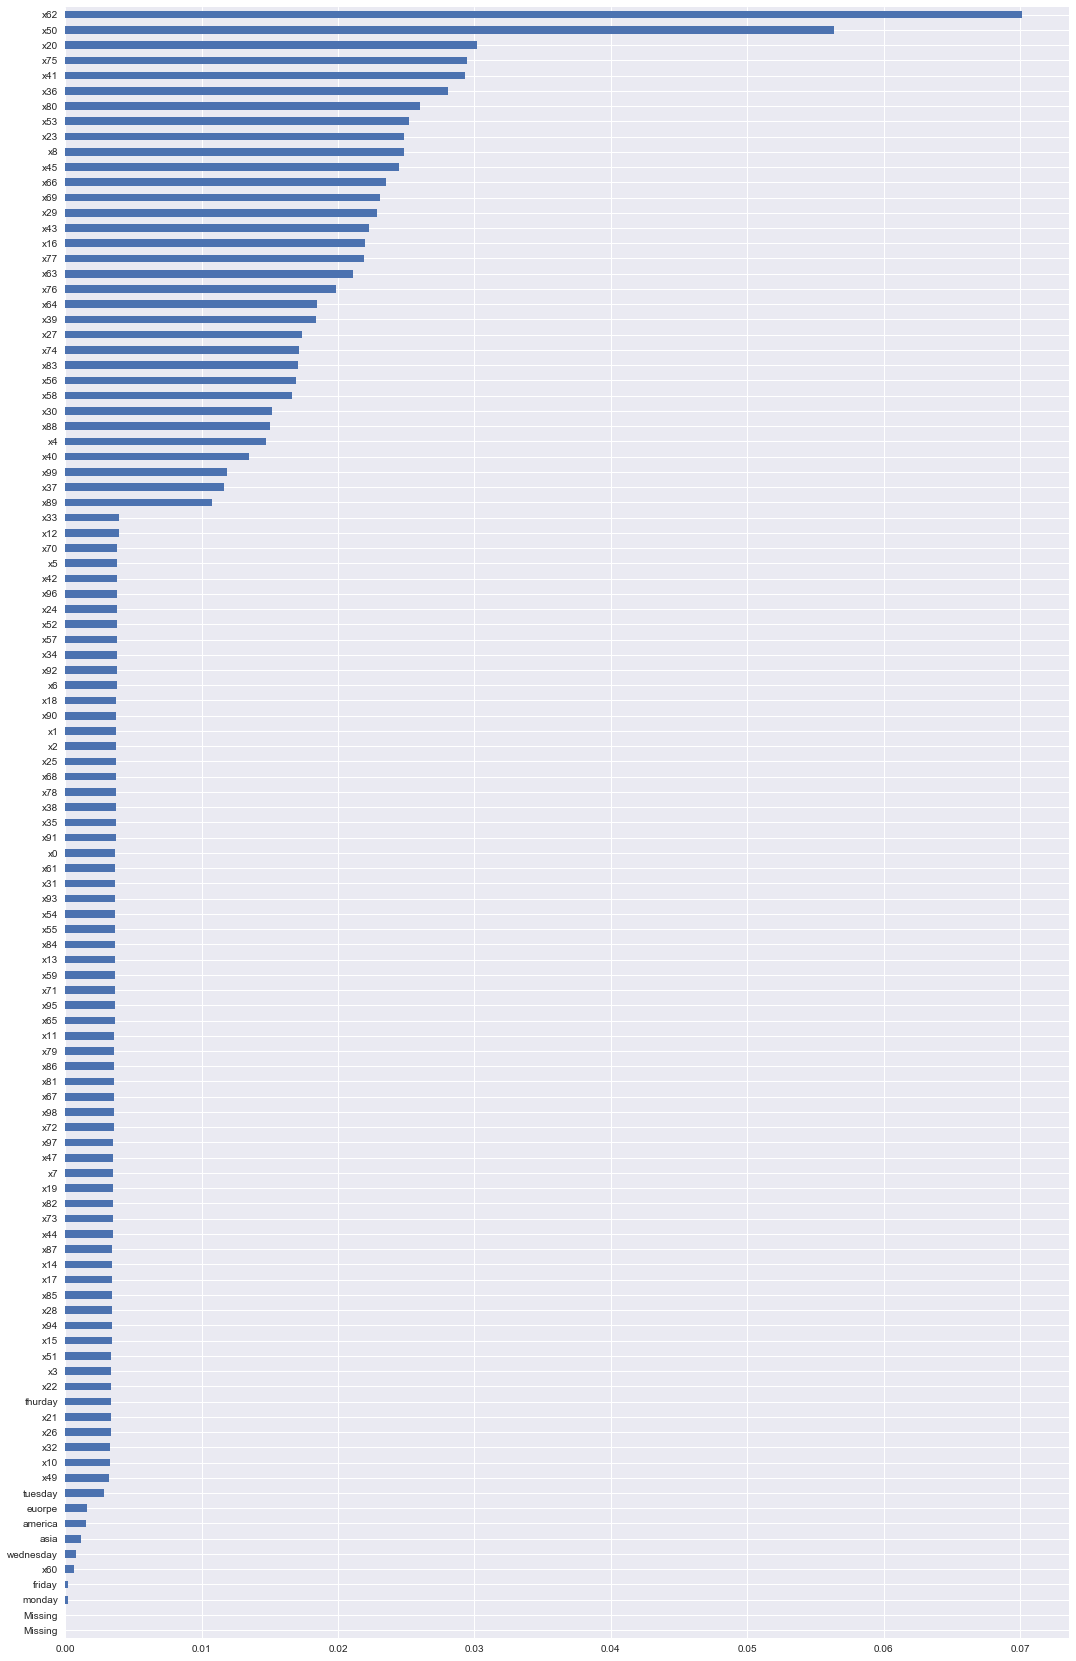

In [34]:
featureimportance = pd.Series(model3.feature_importances_, index=testdf.columns)
featureimportance.sort_values(inplace=True)
featureimportance.plot(kind='barh', figsize=(18,30))

(30, 'trees')
('C-stat: ', 0.97127492813447491)

(50, 'trees')
('C-stat: ', 0.97622962769810229)

(100, 'trees')
('C-stat: ', 0.97959656639498194)



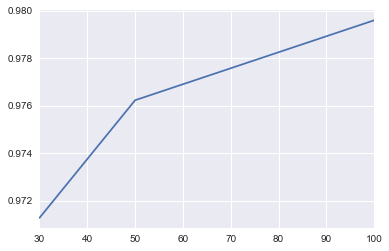

In [35]:
#Parameter tests
results = []
n_estimator_options = [30, 50, 100]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(traindf, y)
    print (trees, "trees")
    roc = roc_auc_score(y, model.oob_prediction_)
    print ("C-stat: ", roc)
    results.append(roc)
    print ("")
    
pd.Series(results, n_estimator_options).plot();

In [42]:
### Grid Search
n_estimators = [30, 50, 100]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [43]:
estimator.fit(traindf[:2000], y[:2000])

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [44]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [45]:
best_rfc = estimator.best_estimator_

In [46]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.86434375


In [48]:
#Final Model
mode3 = RandomForestRegressor(n_estimators=2000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=10)
model.fit(traindf, y)
roc = roc_auc_score(y, model.oob_prediction_)
print ("C-stat: ", roc)

('C-stat: ', 0.97959656639498194)


In [52]:
prediction=model3.predict(testdf)

In [89]:
import time
submission=pd.DataFrame()
submission['Id']=range(0,len(prediction))
submission['y']=prediction
submission.to_csv('Midtermlwen4.csv',index=False)